In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("460lab1abx_data.csv", sep = ",", skiprows=2)
cols = df.columns.values.tolist()
cols
# df

['Data Point #',
 ' Motor Speed [RPM]',
 ' Manometer delta P [dpsi]',
 ' Ambient Temp.[R]',
 ' Viscosity [slug/ft s]',
 ' Ambient Press. [psia]',
 ' Omega Transmitter delta P [dpsi]',
 ' RakeT1 [psid]',
 'RakeT2 [psid]',
 'RakeT3 [psid]',
 'RakeT4 [psid]',
 'RakeT5 [psid]',
 'RakeT6 [psid]',
 'RakeT7 [psid]',
 'RakeT8 [psid]',
 'RakeT9 [psid]',
 'RakeS1 [psid]',
 'RakeS2 [psid]',
 'RakeS3 [psid]',
 'RakeS4 [psid]',
 'RakeS5 [psid]']

In [3]:
df #prints the dataframe for viewing

,Data Point #,Motor Speed [RPM],Manometer delta P [dpsi],Ambient Temp.[R],Viscosity [slug/ft s],Ambient Press. [psia],Omega Transmitter delta P [dpsi],RakeT1 [psid],RakeT2 [psid],RakeT3 [psid],...,RakeT5 [psid],RakeT6 [psid],RakeT7 [psid],RakeT8 [psid],RakeT9 [psid],RakeS1 [psid],RakeS2 [psid],RakeS3 [psid],RakeS4 [psid],RakeS5 [psid]
0,1.0,0.0,0.000000,530.37,3.802343e-07,14.34649,0.000027,0.000133,-0.000003,0.000073,...,0.000071,0.000095,0.000012,-0.000039,0.000006,-0.000015,-0.000031,-0.000078,6.666667e-08,-0.000055
1,2.0,400.0,0.005419,530.37,3.802343e-07,14.34649,0.005327,0.004418,0.004244,0.004358,...,0.004366,0.004388,0.004248,0.004200,0.004176,0.000044,0.000081,-0.000035,4.420000e-05,-0.000025
2,3.0,500.0,0.008598,530.37,3.802343e-07,14.34649,0.008432,0.007125,0.006958,0.007080,...,0.007123,0.007167,0.006928,0.006896,0.006856,0.000083,0.000143,-0.000022,7.703333e-05,-0.000009
3,4.0,600.0,0.012500,530.37,3.802343e-07,14.34649,0.012428,0.010480,0.010304,0.010392,...,0.010505,0.010528,0.010313,0.010292,0.010147,0.000210,0.000302,0.000103,2.123000e-04,0.000104
4,5.0,700.0,0.017558,530.37,3.802343e-07,14.34649,0.017385,0.014860,0.014699,0.014749,...,0.014925,0.014928,0.014596,0.014595,0.014573,0.000060,0.000219,-0.000056,7.750000e-05,-0.000072
5,6.0,800.0,0.023483,530.37,3.802343e-07,14.34649,0.023047,0.019791,0.019537,0.019629,...,0.019892,0.019916,0.019559,0.019549,0.019592,0.000384,0.000580,0.000240,4.121000e-04,0.000235
6,7.0,900.0,0.030275,530.37,3.802343e-07,14.34649,0.029691,0.025834,0.025561,0.025680,...,0.025955,0.026009,0.025563,0.025593,0.025353,0.000502,0.000759,0.000334,4.456667e-04,0.000303
7,8.0,1000.0,0.037573,530.37,3.802343e-07,14.34649,0.037118,0.032364,0.032052,0.032158,...,0.032512,0.032609,0.032020,0.032106,0.032013,0.000496,0.000806,0.000313,5.430667e-04,0.000269
8,9.0,1100.0,0.045521,530.37,3.802343e-07,14.34649,0.045208,0.039624,0.039238,0.039379,...,0.039843,0.039947,0.039260,0.039354,0.039262,0.000425,0.000809,0.000258,5.462667e-04,0.000154
9,10.0,1200.0,0.054264,530.37,3.802343e-07,14.34649,0.053841,0.048012,0.047627,0.047743,...,0.048256,0.048460,0.047608,0.047704,0.047678,0.000372,0.000830,0.000143,5.283667e-04,0.000012


The Omega transmitter measures the difference between ambient pressure and static pressure from the pressure ring. Thus, $\Delta P_{\Omega meas} = P_{atm} - P_{static ring}$. Also, the pressure probes measure relative to the static pressure ring $P_{meas} = P_{total} - P_{static ring}$. Thus, in order to get $P_{total}$: $P_{total} = P_{meas}+P_{static ring} = P_{meas} + P_{atm} - \Delta P_{\Omega meas}$

In [124]:
# P_Tnet = list()
# P_Tnet.append(df[cols[7:16]].mean(axis=1))
# # print(P_Tnet[0])
# P_snet = list()
# P_snet.append(df[cols[17:21]].mean(axis=1))
# print(P_snet[0])
mean_df = pd.concat([df[cols[7:16]].mean(axis=1), df[cols[16:21]].mean(axis=1)], axis=1) #extracts and averages total and static pressure taps
# mean_df.columns = 
# mean_df = mean_df.add(df[cols[5]], axis=0).subtract(df[cols[6]], axis=0) #adds the ambient pressure minus the omega differential pressure

"""
combines all columns into dataframe, while also calculating q_actual = P_T-P_s
"""
mean_df = pd.concat([df[cols[0:2]],mean_df,mean_df[0].subtract(mean_df[1], axis=0)], axis=1) 

mean_df.columns = ['Data point #','Motor RPM',r'$P_{Tavg}$ [psid]',r'$P_{Savg}$ [psid]',r'$q_{actual}$ [dpsi]'] #renames columns from default rangeIndex
# mean_df.drop([7]) #do the drop later to avoid issues importing from main dataframe
# # pd.concat([df,mean_df],axis=1)
mean_df

,Data point #,Motor RPM,$P_{Tavg}$ [psid],$P_{Savg}$ [psid],$q_{actual}$ [dpsi]
0,1.0,0.0,0.000045,-0.000036,0.000081
1,2.0,400.0,0.004299,0.000022,0.004277
2,3.0,500.0,0.007018,0.000054,0.006964
3,4.0,600.0,0.010370,0.000186,0.010184
4,5.0,700.0,0.014737,0.000046,0.014691
5,6.0,800.0,0.019679,0.000370,0.019309
6,7.0,900.0,0.025690,0.000469,0.025222
7,8.0,1000.0,0.032223,0.000486,0.031738
8,9.0,1100.0,0.039481,0.000439,0.039043
9,10.0,1200.0,0.047879,0.000377,0.047502


In [125]:
rpm_cols = ['Data point #','Motor RPM',r'$q_{actual}$ [dpsi]',r'$v_{actual}$ [ft/s]','Re/L','Mach #']
"""
q_actual = 1/2*rho*v**2
v = np.sqrt(2*q_actual/rho)
rho = P/(R*T)
R = 1716
Re/L = rho*v/mu
"""
R = 1716 #ft-lbf/slug/deg R
rho_df = df[cols[5]]*144/(R*df[cols[3]]) #using ambient pressure, convert to psf, then use ideal gas law (slug/ft^3)
v_df = (2*mean_df.iloc[:,4]*144/(rho_df))**0.5 #convert q_actual to psf, then use equation
Mach_df = v_df/(1.4*R*df[cols[3]])**0.5
# type(mean_df.iloc[:,4])
# type(df[cols[3]])
# type(pd.Series(df[cols[3]]))
# pd.Series(mean_df.iloc[:,4])
# rho_df
rpm_df = pd.DataFrame({
                rpm_cols[0]: df[cols[0]],
                rpm_cols[1]: df[cols[1]],
                rpm_cols[2]: pd.Series(mean_df.iloc[:,4]),
                rpm_cols[3]: v_df,
                rpm_cols[4]: rho_df*v_df/df[cols[4]],
                rpm_cols[5]: Mach_df,
              })
rpm_df
# rho_df
# v_df
# rpm_df = pd.DataFrame([df[cols[0:2]],mean_df['q_actual [dpsi]'],v_df,rho_df*v_df/df[cols[4]],Mach_df],columns=rpm_cols)


,Data point #,Motor RPM,$q_{actual}$ [dpsi],$v_{actual}$ [ft/s],Re/L,Mach #
0,1.0,0.0,0.000081,3.197378,19087.742451,0.002833
1,2.0,400.0,0.004277,23.294364,139062.962503,0.020637
2,3.0,500.0,0.006964,29.723819,177445.598835,0.026333
3,4.0,600.0,0.010184,35.945818,214589.759791,0.031845
4,5.0,700.0,0.014691,43.174085,257741.153767,0.038248
5,6.0,800.0,0.019309,49.495531,295478.997668,0.043848
6,7.0,900.0,0.025222,56.568776,337704.937777,0.050115
7,8.0,1000.0,0.031738,63.456907,378825.780455,0.056217
8,9.0,1100.0,0.039043,70.381992,420167.233297,0.062352
9,10.0,1200.0,0.047502,77.632779,463453.063593,0.068775


In [131]:
print(rpm_df.to_latex(index=False,float_format="%.2e"))

\begin{tabular}{rrrrrr}
\toprule
Data point # & Motor RPM & $q_{actual}$ [dpsi] & $v_{actual}$ [ft/s] & Re/L & Mach # \\
\midrule
1.00e+00 & 0.00e+00 & 8.06e-05 & 3.20e+00 & 1.91e+04 & 2.83e-03 \\
2.00e+00 & 4.00e+02 & 4.28e-03 & 2.33e+01 & 1.39e+05 & 2.06e-02 \\
3.00e+00 & 5.00e+02 & 6.96e-03 & 2.97e+01 & 1.77e+05 & 2.63e-02 \\
4.00e+00 & 6.00e+02 & 1.02e-02 & 3.59e+01 & 2.15e+05 & 3.18e-02 \\
5.00e+00 & 7.00e+02 & 1.47e-02 & 4.32e+01 & 2.58e+05 & 3.82e-02 \\
6.00e+00 & 8.00e+02 & 1.93e-02 & 4.95e+01 & 2.95e+05 & 4.38e-02 \\
7.00e+00 & 9.00e+02 & 2.52e-02 & 5.66e+01 & 3.38e+05 & 5.01e-02 \\
8.00e+00 & 1.00e+03 & 3.17e-02 & 6.35e+01 & 3.79e+05 & 5.62e-02 \\
9.00e+00 & 1.10e+03 & 3.90e-02 & 7.04e+01 & 4.20e+05 & 6.24e-02 \\
1.00e+01 & 1.20e+03 & 4.75e-02 & 7.76e+01 & 4.63e+05 & 6.88e-02 \\
1.10e+01 & 1.30e+03 & 5.49e-02 & 8.34e+01 & 4.98e+05 & 7.39e-02 \\
1.20e+01 & 1.40e+03 & 6.47e-02 & 9.06e+01 & 5.41e+05 & 8.02e-02 \\
1.30e+01 & 1.00e+03 & 3.24e-02 & 6.41e+01 & 3.82e+05 & 5.68e-02 \\

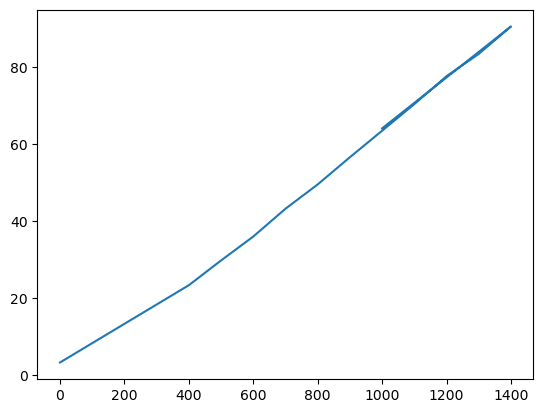

In [126]:
plt.plot(rpm_df['Motor RPM'],rpm_df[r'$v_{actual}$ [ft/s]'])


In [129]:
TPV = (df[cols[7:16]].subtract(mean_df.iloc[:,2],axis=0)).div(mean_df.iloc[:,4],axis=0)
TPV

,RakeT1 [psid],RakeT2 [psid],RakeT3 [psid],RakeT4 [psid],RakeT5 [psid],RakeT6 [psid],RakeT7 [psid],RakeT8 [psid],RakeT9 [psid]
0,1.100452,-0.588630,0.350439,0.105950,0.321067,0.629677,-0.401230,-1.035825,-0.481899
1,0.027938,-0.012793,0.013901,-0.001897,0.015662,0.020845,-0.011881,-0.023066,-0.028709
2,0.015303,-0.008593,0.008932,0.001565,0.015054,0.021358,-0.012920,-0.017444,-0.023255
3,0.010775,-0.006454,0.002118,0.000059,0.013204,0.015475,-0.005590,-0.007692,-0.021894
4,0.008370,-0.002591,0.000819,-0.002031,0.012812,0.013019,-0.009593,-0.009650,-0.011154
5,0.005832,-0.007345,-0.002565,-0.001877,0.011032,0.012294,-0.006195,-0.006701,-0.004474
6,0.005693,-0.005114,-0.000411,-0.000974,0.010475,0.012642,-0.005066,-0.003867,-0.013378
7,0.004444,-0.005406,-0.002052,-0.001481,0.009087,0.012147,-0.006404,-0.003712,-0.006623
8,0.003653,-0.006229,-0.002623,-0.001413,0.009264,0.011911,-0.005677,-0.003263,-0.005622
9,0.002801,-0.005314,-0.002861,-0.001155,0.007930,0.012227,-0.005701,-0.003690,-0.004237


In [130]:
SPV = (df[cols[16:21]].subtract(mean_df.iloc[:,3],axis=0)).div(mean_df.iloc[:,4],axis=0)
SPV

,RakeS1 [psid],RakeS2 [psid],RakeS3 [psid],RakeS4 [psid],RakeS5 [psid]
0,0.259547,0.056840,-0.521080,0.445706,-0.241014
1,0.005122,0.013890,-0.013256,0.005216,-0.010972
2,0.004119,0.012658,-0.010912,0.003243,-0.009107
3,0.002292,0.011356,-0.008149,0.002558,-0.008057
4,0.000981,0.011774,-0.006937,0.002175,-0.007992
5,0.000724,0.010854,-0.006722,0.002170,-0.007026
6,0.001313,0.011514,-0.005344,-0.000914,-0.006569
7,0.000342,0.010110,-0.005441,0.001814,-0.006825
8,-0.000359,0.009494,-0.004616,0.002759,-0.007278
9,-0.000112,0.009529,-0.004921,0.003183,-0.007678
